
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fare_amount  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
         fare_amount
count  100000.000000
mean       11.354652
std         9.716777
min       -44.900000
25%         6.000000
50%         8.500000
75%        12.500000
max       200.000000

--- Basic Statistics ---
Mean Fare: 11.35
Standard Deviation: 9.72
Median Fare: 8.50
IQR: 6.50


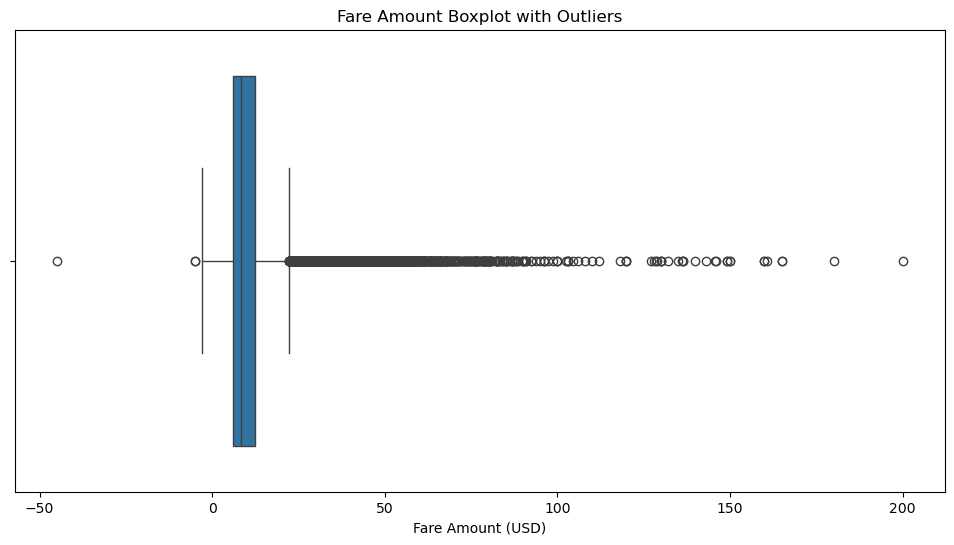

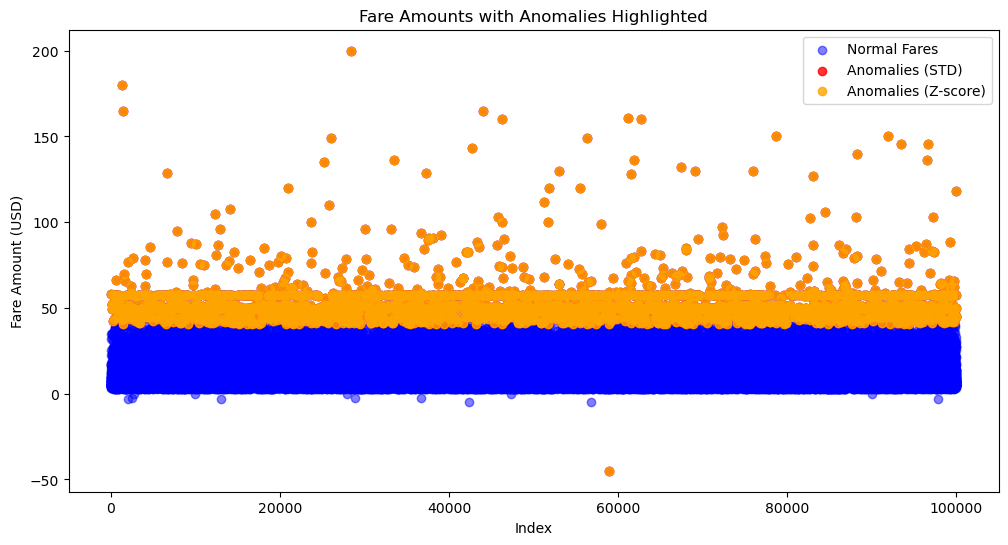


--- Anomalies Detected ---
Standard Deviation Method: 2727 anomalies
IQR Method: 8718 anomalies
Z-score Method: 2727 anomalies
Modified Z-score Method: 7655 anomalies
Percentile Method: 1837 anomalies
Mean-based Method: 3522 anomalies

All detected anomalies saved to 'detected_anomalies_with_thresholds.csv'


In [3]:
# -------------------------------------
# 📥 Import Libraries and Load Data
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Load 100k rows for efficiency)
data = pd.read_csv('train.csv', usecols=['fare_amount'], nrows=100000)

# Display basic info
print("\n--- Dataset Info ---")
print(data.info())
print(data.describe())

# -------------------------------------
# 🔍 Basic Statistics
# -------------------------------------
mean_fare = data['fare_amount'].mean()
std_fare = data['fare_amount'].std()
median_fare = data['fare_amount'].median()
q1 = data['fare_amount'].quantile(0.25)
q3 = data['fare_amount'].quantile(0.75)
iqr = q3 - q1

# Display statistics
print("\n--- Basic Statistics ---")
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Standard Deviation: {std_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"IQR: {iqr:.2f}")

# -------------------------------------
# 📊 Thresholds for Anomaly Detection
# -------------------------------------

# Standard Deviation Threshold
std_threshold = 3
lower_std, upper_std = mean_fare - std_threshold * std_fare, mean_fare + std_threshold * std_fare

# IQR Threshold
lower_iqr, upper_iqr = q1 - 1.5 * iqr, q3 + 1.5 * iqr

# Z-score Threshold
z_threshold = 3
data['z_score'] = (data['fare_amount'] - mean_fare) / std_fare

# Modified Z-score Threshold (MAD)
mad = np.median(np.abs(data['fare_amount'] - median_fare))
data['mod_z_score'] = 0.6745 * (data['fare_amount'] - median_fare) / mad
mod_z_threshold = 3.5

# Percentile Threshold
lower_percentile = np.percentile(data['fare_amount'], 1)
upper_percentile = np.percentile(data['fare_amount'], 99)

# Mean-based Threshold
mean_threshold = 2.5
lower_mean, upper_mean = mean_fare - mean_threshold * std_fare, mean_fare + mean_threshold * std_fare

# -------------------------------------
# ✅ Detect Anomalies Using Multiple Methods
# -------------------------------------

# Standard Deviation Method
anomalies_std = data[(data['fare_amount'] < lower_std) | (data['fare_amount'] > upper_std)]

# IQR Method
anomalies_iqr = data[(data['fare_amount'] < lower_iqr) | (data['fare_amount'] > upper_iqr)]

# Z-score Method
anomalies_z = data[(data['z_score'].abs() > z_threshold)]

# Modified Z-score Method
anomalies_mod_z = data[(data['mod_z_score'].abs() > mod_z_threshold)]

# Percentile Method
anomalies_percentile = data[(data['fare_amount'] < lower_percentile) | (data['fare_amount'] > upper_percentile)]

# Mean-based Method
anomalies_mean = data[(data['fare_amount'] < lower_mean) | (data['fare_amount'] > upper_mean)]

# -------------------------------------
# 📊 Visualization: Boxplot with Outliers
# -------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['fare_amount'])
plt.title('Fare Amount Boxplot with Outliers')
plt.xlabel('Fare Amount (USD)')
plt.show()

# -------------------------------------
# 📉 Scatter Plot of Anomalies
# -------------------------------------
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['fare_amount'], label='Normal Fares', color='blue', alpha=0.5)
plt.scatter(anomalies_std.index, anomalies_std['fare_amount'], label='Anomalies (STD)', color='red', alpha=0.8)
plt.scatter(anomalies_z.index, anomalies_z['fare_amount'], label='Anomalies (Z-score)', color='orange', alpha=0.8)
plt.title('Fare Amounts with Anomalies Highlighted')
plt.xlabel('Index')
plt.ylabel('Fare Amount (USD)')
plt.legend()
plt.show()

# -------------------------------------
# 📉 Print Anomaly Counts
# -------------------------------------
print("\n--- Anomalies Detected ---")
print(f"Standard Deviation Method: {len(anomalies_std)} anomalies")
print(f"IQR Method: {len(anomalies_iqr)} anomalies")
print(f"Z-score Method: {len(anomalies_z)} anomalies")
print(f"Modified Z-score Method: {len(anomalies_mod_z)} anomalies")
print(f"Percentile Method: {len(anomalies_percentile)} anomalies")
print(f"Mean-based Method: {len(anomalies_mean)} anomalies")

# -------------------------------------
# ✅ Save Anomalies to CSV
# -------------------------------------
# Combine all anomaly detections
anomalies_combined = pd.concat([
    anomalies_std, anomalies_iqr, anomalies_z, anomalies_mod_z, anomalies_percentile, anomalies_mean
])

# Remove duplicates
anomalies_combined.drop_duplicates(inplace=True)

# Save to CSV
anomalies_combined.to_csv("detected_anomalies_with_thresholds.csv", index=False)
print("\nAll detected anomalies saved to 'detected_anomalies_with_thresholds.csv'")